In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

### 1. Load DataSets

In [2]:
cancer = load_breast_cancer()
cancer # target이 0과 1로 malignant, benign 바이너리 데이터임을 알 수 있다.

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer.data.shape # 특징이 30개로 차원이 많고 데이터양이 569개밖에 안된다. accuracy가 낮게 나올것을 예상

(569, 30)

### 2. Cancer Data Analysis

In [4]:
X = cancer.data
y = cancer.target
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(f'특징 이름 리스트 : {cancer.feature_names}')
print('*'*30)
print(f'타겟 이름 리스트 : {cancer.target_names}')
print(f'타겟 크기  : {cancer.data.shape}')

특징 이름 리스트 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
******************************
타겟 이름 리스트 : ['malignant' 'benign']
타겟 크기  : (569, 30)


In [6]:
# 디렉토리 안에 있는 키를 가져온다.
print(dir(cancer) )
print(cancer.keys())

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# 바이너리를 불러올떄 자주 사용된다.
np.bincount(cancer.target)

# target[0]  212=악성 , target[1] 357=양성

array([212, 357], dtype=int64)

In [8]:
# 갯수 다시 확인
print(cancer.target[cancer.target==0].shape)
print(cancer.target[cancer.target==1].shape)

(212,)
(357,)


In [9]:
a = {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
print(f'sample : {a}')

sample : {'malignant': 212, 'benign': 357}


In [10]:
print('sample : {}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample : {'malignant': 212, 'benign': 357}


In [11]:
for i, name in enumerate(cancer.feature_names):
    print(i, name)

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


### 3. Model Generator and fitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [13]:
dTree = DecisionTreeClassifier()

In [14]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier()

### 4. Prediction

In [15]:
pred = dTree.predict(X_test)

In [16]:
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

###  5. Model Evaluate

In [17]:
score = accuracy_score(pred, y_test, normalize=True)

In [18]:
score

0.8947368421052632

In [19]:
# normalize True가 디폴드 값인데, False를 넣게 되면 예측해서 맞은 데이터의 갯수를 말한다.
score = accuracy_score(pred, y_test, normalize=False)

In [20]:
score

102

### 6. Graphviz Visualize

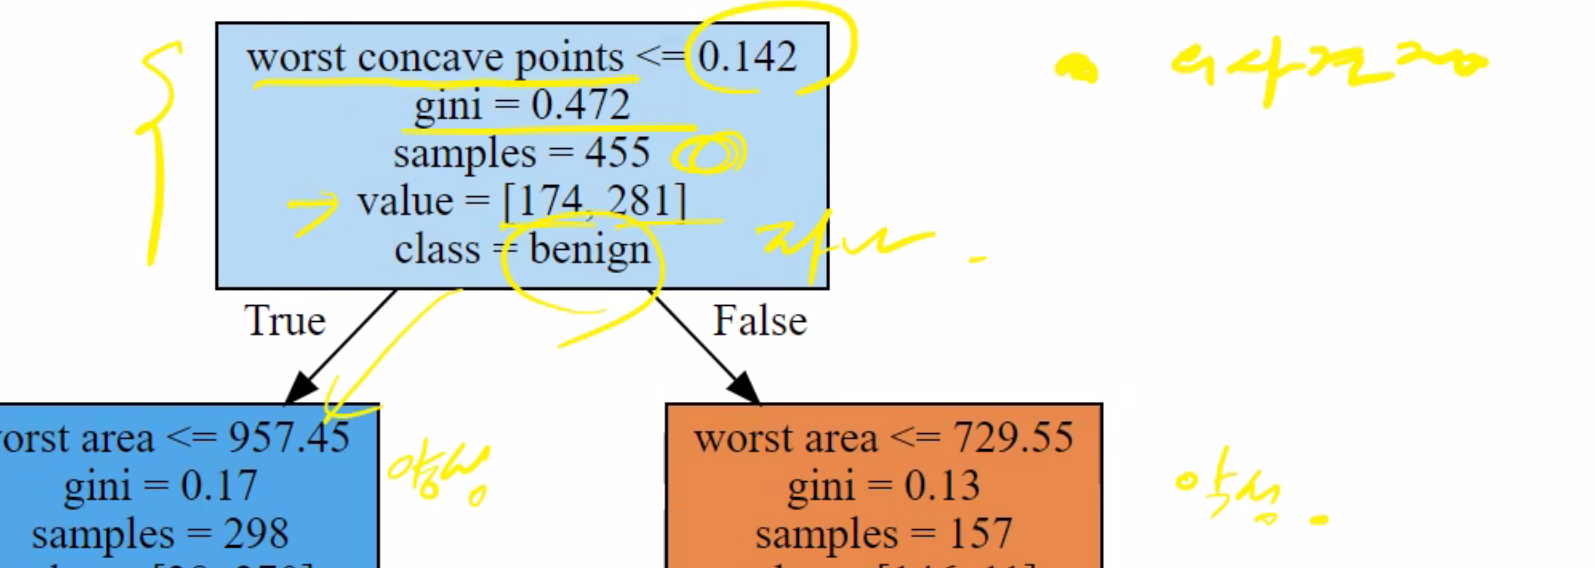

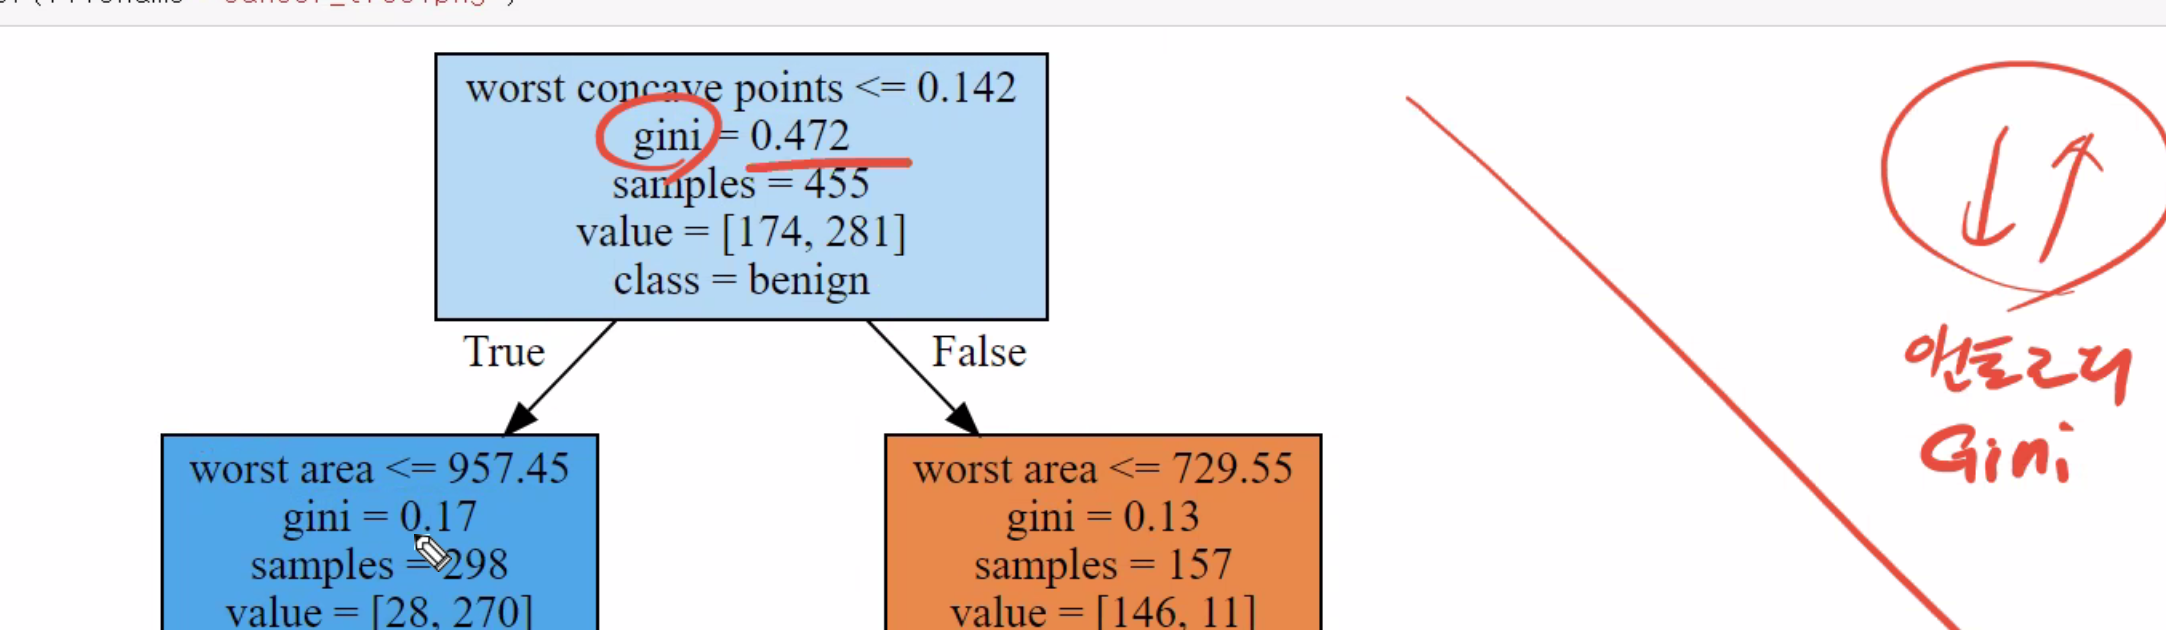

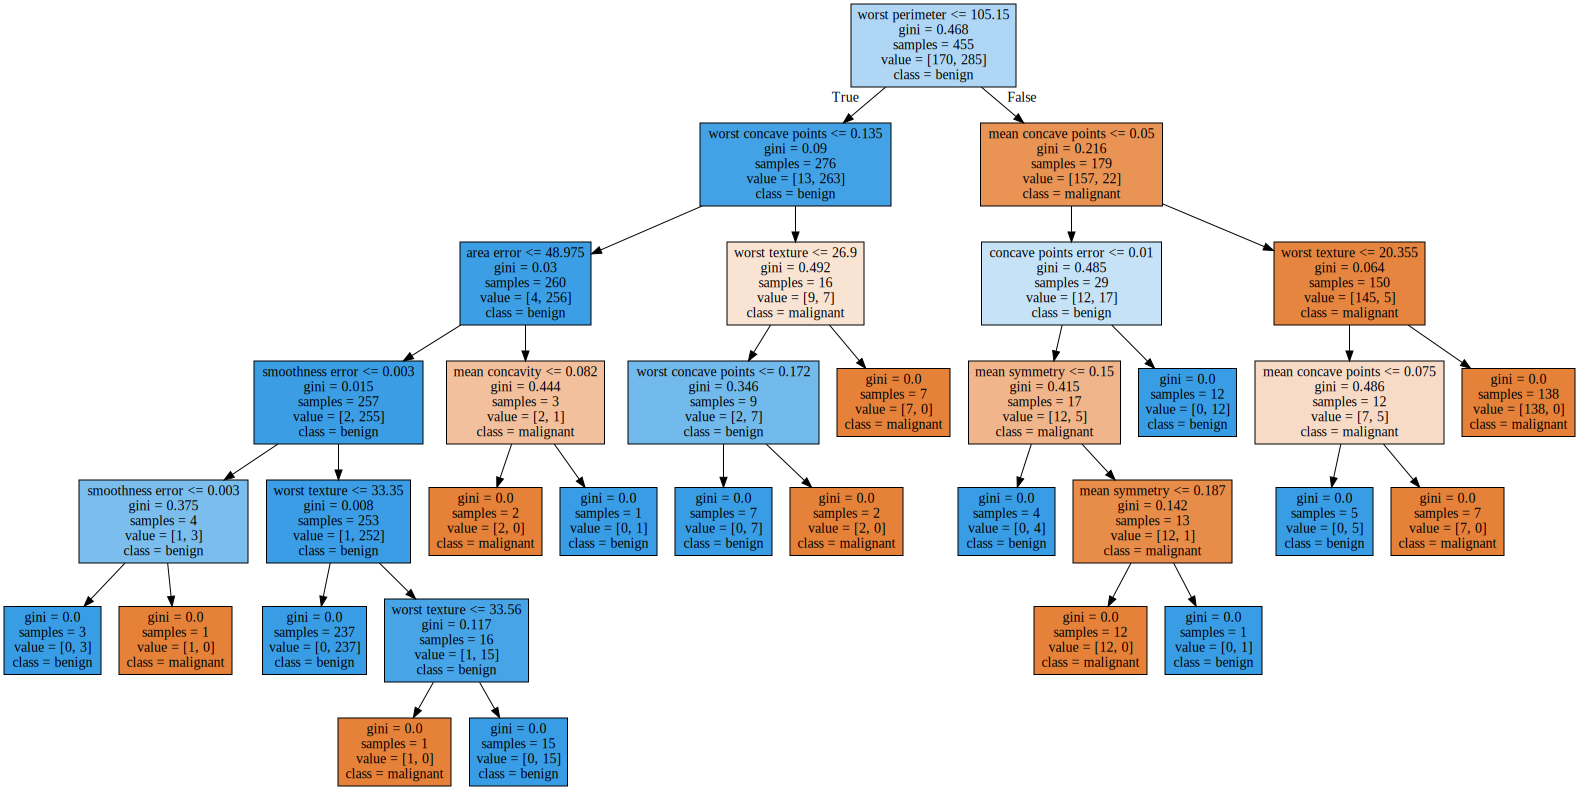

'cancer_tree.png.pdf'

In [21]:
import graphviz
# impurity : 지니계수
# filled : 색채움

from sklearn.tree import export_graphviz
export_graphviz(dTree, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                filled = True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')
# leafnode의 gini값은 다 0이나옴. 불순물이 다 걸러진 경우이다.